# importing libraries

In [1]:
import pandas as pd
import numpy as np

# loading datasets

In [2]:
from pandas import read_excel
df = pd.read_excel("C:\\Users\\sudharsan\\Desktop\\file_01_current_suppy_network.xlsx")
df1 = pd.read_excel("C:\\Users\\sudharsan\\Desktop\\file_02_cost_data.xlsx")
df2 = pd.read_excel("C:\\Users\\sudharsan\\Desktop\\file_04_zone_info-1.xlsx")

In [3]:
df = df.rename(columns={'supplier_location': 'source'})
df

,source,customer_location,shpment_size,payment_option,product_quantity,current_logistics_vendor
0,facility_01,201301,small,cod,2156,v1
1,facility_01,122001,small,cod,1859,v1
2,facility_01,248001,small,cod,1805,v1
3,facility_01,201301,small,prepaid,1555,v1
4,facility_01,800001,small,cod,1508,v1
...,...,...,...,...,...,...
92846,facility_10,842002,small,prepaid,5,v1
92847,facility_10,843108,small,cod,5,v1
92848,facility_10,846003,small,cod,5,v1
92849,facility_10,848101,small,prepaid,5,v1


In [4]:
df['current_logistics_vendor'].value_counts()

v1    74515
v4    10217
v3     4867
v2     3252
Name: current_logistics_vendor, dtype: int64

In [5]:
df['shpment_size'].value_counts()

small     64112
medium    27239
large      1500
Name: shpment_size, dtype: int64

In [6]:
df['payment_option'].value_counts()

cod        64592
prepaid    28259
Name: payment_option, dtype: int64

In [7]:
df.dtypes

source                      object
customer_location            int64
shpment_size                object
payment_option              object
product_quantity             int64
current_logistics_vendor    object
dtype: object

In [8]:
d = df.groupby(['current_logistics_vendor','source','customer_location','shpment_size','payment_option']).agg(prod_qty=('product_quantity', sum))
d = d.reset_index()
d

,current_logistics_vendor,source,customer_location,shpment_size,payment_option,prod_qty
0,v1,facility_01,110001,medium,cod,205
1,v1,facility_01,110001,medium,prepaid,152
2,v1,facility_01,110001,small,cod,371
3,v1,facility_01,110001,small,prepaid,233
4,v1,facility_01,110002,medium,cod,99
...,...,...,...,...,...,...
92846,v4,facility_10,851112,small,cod,5
92847,v4,facility_10,854105,small,cod,12
92848,v4,facility_10,854301,medium,cod,7
92849,v4,facility_10,854301,small,cod,13


In [9]:
df2.dtypes

source           object
destination       int64
shipment_zone    object
dtype: object

In [10]:
f = df2.groupby(['source','destination','shipment_zone']).agg({'destination': ['count']})
f = f.reset_index()
f.columns = ['source','destination','shipment_zone','destination_count']
f

,source,destination,shipment_zone,destination_count
0,facility_01,110001,zone_a,4
1,facility_01,110002,zone_a,4
2,facility_01,110003,zone_a,4
3,facility_01,110004,zone_a,1
4,facility_01,110005,zone_a,4
...,...,...,...,...
45502,facility_10,851117,zone_c,1
45503,facility_10,852201,zone_c,1
45504,facility_10,854105,zone_c,1
45505,facility_10,854301,zone_c,2


In [11]:
d = d.rename(columns={'customer_location': 'destination'})
d

,current_logistics_vendor,source,destination,shpment_size,payment_option,prod_qty
0,v1,facility_01,110001,medium,cod,205
1,v1,facility_01,110001,medium,prepaid,152
2,v1,facility_01,110001,small,cod,371
3,v1,facility_01,110001,small,prepaid,233
4,v1,facility_01,110002,medium,cod,99
...,...,...,...,...,...,...
92846,v4,facility_10,851112,small,cod,5
92847,v4,facility_10,854105,small,cod,12
92848,v4,facility_10,854301,medium,cod,7
92849,v4,facility_10,854301,small,cod,13


# Merging product information with zone information

In [12]:
cols = ['source', 'destination']
df = pd.merge(d, f, on=cols)
df

,current_logistics_vendor,source,destination,shpment_size,payment_option,prod_qty,shipment_zone,destination_count
0,v1,facility_01,110001,medium,cod,205,zone_a,4
1,v1,facility_01,110001,medium,prepaid,152,zone_a,4
2,v1,facility_01,110001,small,cod,371,zone_a,4
3,v1,facility_01,110001,small,prepaid,233,zone_a,4
4,v1,facility_01,110002,medium,cod,99,zone_a,4
...,...,...,...,...,...,...,...,...
92846,v4,facility_10,845305,small,cod,13,zone_c,1
92847,v4,facility_10,854105,small,cod,12,zone_c,1
92848,v4,facility_10,854301,medium,cod,7,zone_c,2
92849,v4,facility_10,854301,small,cod,13,zone_c,2


In [13]:
df = df.drop(['destination_count'], axis=1)
df

,current_logistics_vendor,source,destination,shpment_size,payment_option,prod_qty,shipment_zone
0,v1,facility_01,110001,medium,cod,205,zone_a
1,v1,facility_01,110001,medium,prepaid,152,zone_a
2,v1,facility_01,110001,small,cod,371,zone_a
3,v1,facility_01,110001,small,prepaid,233,zone_a
4,v1,facility_01,110002,medium,cod,99,zone_a
...,...,...,...,...,...,...,...
92846,v4,facility_10,845305,small,cod,13,zone_c
92847,v4,facility_10,854105,small,cod,12,zone_c
92848,v4,facility_10,854301,medium,cod,7,zone_c
92849,v4,facility_10,854301,small,cod,13,zone_c


In [14]:
df.dtypes

current_logistics_vendor    object
source                      object
destination                  int64
shpment_size                object
payment_option              object
prod_qty                     int64
shipment_zone               object
dtype: object

In [15]:
df1

,zone,mode,size,cost_with_vendor_v1,cost_with_vendor_v2,cost_with_vendor_v3,cost_with_vendor_v4
0,zone_C,cod,large,1480,1480,1100,1080
1,zone_C,cod,medium,480,560,410,410
2,zone_C,cod,small,90,120,80,80
3,zone_C,prepaid,large,1450,1430,1040,1050
4,zone_C,prepaid,medium,450,510,380,370
5,zone_C,prepaid,small,60,70,60,50
6,zone_a,COD,large,740,780,380,710
7,zone_a,COD,medium,210,310,160,270
8,zone_a,COD,small,50,90,50,60
9,zone_a,prepaid,large,720,730,360,680


In [16]:
dff = df1.rename(columns={'cost_with_vendor_v1': 'v1', 'cost_with_vendor_v2':'v2', 'cost_with_vendor_v3':'v3', 'cost_with_vendor_v4':'v4', 'zone':'shipment_zone', 'mode':'payment_option', 'size':'shpment_size'})
dff

,shipment_zone,payment_option,shpment_size,v1,v2,v3,v4
0,zone_C,cod,large,1480,1480,1100,1080
1,zone_C,cod,medium,480,560,410,410
2,zone_C,cod,small,90,120,80,80
3,zone_C,prepaid,large,1450,1430,1040,1050
4,zone_C,prepaid,medium,450,510,380,370
5,zone_C,prepaid,small,60,70,60,50
6,zone_a,COD,large,740,780,380,710
7,zone_a,COD,medium,210,310,160,270
8,zone_a,COD,small,50,90,50,60
9,zone_a,prepaid,large,720,730,360,680


In [17]:
s = dff.apply(lambda x: x.astype(str).str.lower())
s

,shipment_zone,payment_option,shpment_size,v1,v2,v3,v4
0,zone_c,cod,large,1480,1480,1100,1080
1,zone_c,cod,medium,480,560,410,410
2,zone_c,cod,small,90,120,80,80
3,zone_c,prepaid,large,1450,1430,1040,1050
4,zone_c,prepaid,medium,450,510,380,370
5,zone_c,prepaid,small,60,70,60,50
6,zone_a,cod,large,740,780,380,710
7,zone_a,cod,medium,210,310,160,270
8,zone_a,cod,small,50,90,50,60
9,zone_a,prepaid,large,720,730,360,680


# Merging the the above combination dataset with cost information data

In [18]:
cols = ['shipment_zone', 'payment_option','shpment_size']
re = pd.merge(df, s, on=cols)
re

,current_logistics_vendor,source,destination,shpment_size,payment_option,prod_qty,shipment_zone,v1,v2,v3,v4
0,v1,facility_01,110001,medium,cod,205,zone_a,210,310,160,270
1,v1,facility_01,110002,medium,cod,99,zone_a,210,310,160,270
2,v1,facility_01,110003,medium,cod,172,zone_a,210,310,160,270
3,v1,facility_01,110005,medium,cod,170,zone_a,210,310,160,270
4,v1,facility_01,110006,medium,cod,210,zone_a,210,310,160,270
...,...,...,...,...,...,...,...,...,...,...,...
92846,v1,facility_10,457001,large,prepaid,5,zone_b,850,800,460,810
92847,v1,facility_10,485001,large,prepaid,5,zone_b,850,800,460,810
92848,v3,facility_06,173205,large,prepaid,5,zone_b,850,800,460,810
92849,v2,facility_09,785614,large,prepaid,5,zone_b,850,800,460,810


In [19]:
re.dtypes

current_logistics_vendor    object
source                      object
destination                  int64
shpment_size                object
payment_option              object
prod_qty                     int64
shipment_zone               object
v1                          object
v2                          object
v3                          object
v4                          object
dtype: object

In [20]:
re['v1']=re['v1'].astype(int)
re['v2']=re['v2'].astype(int)
re['v3']=re['v3'].astype(int)
re['v4']=re['v4'].astype(int)

In [21]:
re.dtypes

current_logistics_vendor    object
source                      object
destination                  int64
shpment_size                object
payment_option              object
prod_qty                     int64
shipment_zone               object
v1                           int32
v2                           int32
v3                           int32
v4                           int32
dtype: object

# vendorwise supply volume distributed

In [22]:
q1 = re.groupby(['current_logistics_vendor']).agg(prod_vol=('prod_qty', sum))
q1 = q1.reset_index()
q1

,current_logistics_vendor,prod_vol
0,v1,3099255
1,v2,94423
2,v3,116688
3,v4,194907


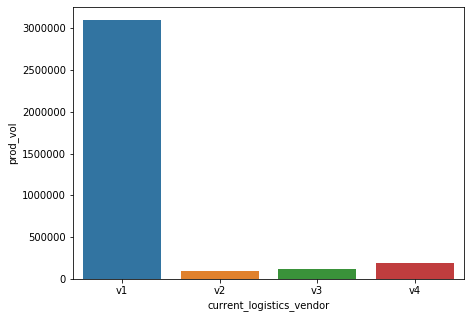

In [24]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (7,5)
sns.barplot(x="current_logistics_vendor", y="prod_vol", data=q1);

In [25]:
re = re.rename(columns={'v1': 'cost_per_prod_v1', 'v2':'cost_per_prod_v2', 'v3':'cost_per_prod_v3', 'v4':'cost_per_prod_v4'})
re

,current_logistics_vendor,source,destination,shpment_size,payment_option,prod_qty,shipment_zone,cost_per_prod_v1,cost_per_prod_v2,cost_per_prod_v3,cost_per_prod_v4
0,v1,facility_01,110001,medium,cod,205,zone_a,210,310,160,270
1,v1,facility_01,110002,medium,cod,99,zone_a,210,310,160,270
2,v1,facility_01,110003,medium,cod,172,zone_a,210,310,160,270
3,v1,facility_01,110005,medium,cod,170,zone_a,210,310,160,270
4,v1,facility_01,110006,medium,cod,210,zone_a,210,310,160,270
...,...,...,...,...,...,...,...,...,...,...,...
92846,v1,facility_10,457001,large,prepaid,5,zone_b,850,800,460,810
92847,v1,facility_10,485001,large,prepaid,5,zone_b,850,800,460,810
92848,v3,facility_06,173205,large,prepaid,5,zone_b,850,800,460,810
92849,v2,facility_09,785614,large,prepaid,5,zone_b,850,800,460,810


In [26]:
re['cost_incurred_v1'] = re['prod_qty'] * re['cost_per_prod_v1']
re['cost_incurred_v2'] = re['prod_qty'] * re['cost_per_prod_v2']
re['cost_incurred_v3'] = re['prod_qty'] * re['cost_per_prod_v3']
re['cost_incurred_v4'] = re['prod_qty'] * re['cost_per_prod_v4']
re

,current_logistics_vendor,source,destination,shpment_size,payment_option,prod_qty,shipment_zone,cost_per_prod_v1,cost_per_prod_v2,cost_per_prod_v3,cost_per_prod_v4,cost_incurred_v1,cost_incurred_v2,cost_incurred_v3,cost_incurred_v4
0,v1,facility_01,110001,medium,cod,205,zone_a,210,310,160,270,43050,63550,32800,55350
1,v1,facility_01,110002,medium,cod,99,zone_a,210,310,160,270,20790,30690,15840,26730
2,v1,facility_01,110003,medium,cod,172,zone_a,210,310,160,270,36120,53320,27520,46440
3,v1,facility_01,110005,medium,cod,170,zone_a,210,310,160,270,35700,52700,27200,45900
4,v1,facility_01,110006,medium,cod,210,zone_a,210,310,160,270,44100,65100,33600,56700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92846,v1,facility_10,457001,large,prepaid,5,zone_b,850,800,460,810,4250,4000,2300,4050
92847,v1,facility_10,485001,large,prepaid,5,zone_b,850,800,460,810,4250,4000,2300,4050
92848,v3,facility_06,173205,large,prepaid,5,zone_b,850,800,460,810,4250,4000,2300,4050
92849,v2,facility_09,785614,large,prepaid,5,zone_b,850,800,460,810,4250,4000,2300,4050


In [27]:
v1 = re.groupby(['cost_per_prod_v1']).agg(cost_of_v1=('cost_incurred_v1', sum))
v1 = v1.reset_index()
v1 = v1['cost_of_v1'].sum()
v1

414289240

In [28]:
v2 = re.groupby(['cost_per_prod_v2']).agg(cost_of_v2=('cost_incurred_v2', sum))
v2 = v2.reset_index()
v2 = v2['cost_of_v2'].sum()
v2

536187730

In [29]:
v3 = re.groupby(['cost_per_prod_v3']).agg(cost_of_v3=('cost_incurred_v3', sum))
v3 = v3.reset_index()
v3 = v3['cost_of_v3'].sum()
v3

352614510

In [30]:
v4 = re.groupby(['cost_per_prod_v4']).agg(cost_of_v4=('cost_incurred_v4', sum))
v4 = v4.reset_index()
v4 = v4['cost_of_v4'].sum()
v4

416713460

In [31]:
p = [v1,v2,v3,v4]
p = pd.DataFrame(p)
p.columns = ['cost_incurred']
q = ['v1','v2','v3','v4']
p['vendor'] = q
p

,cost_incurred,vendor
0,414289240,v1
1,536187730,v2
2,352614510,v3
3,416713460,v4


# vendorwise cost_incurred for fulfilling the supply network

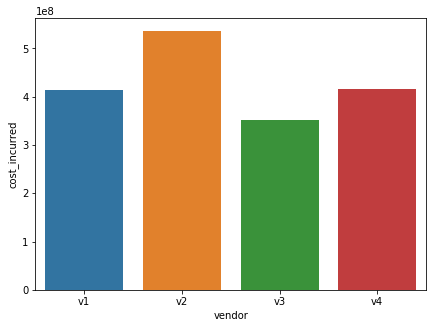

In [32]:
#vendor wise cost incurred
sns.barplot(x="vendor", y="cost_incurred", data=p);

In [33]:
q1 = q1.rename(columns={'current_logistics_vendor': 'vendor'})
q1

,vendor,prod_vol
0,v1,3099255
1,v2,94423
2,v3,116688
3,v4,194907


In [34]:
x = pd.merge(q1,p,on='vendor')
x

,vendor,prod_vol,cost_incurred
0,v1,3099255,414289240
1,v2,94423,536187730
2,v3,116688,352614510
3,v4,194907,416713460


In [35]:
x['avg_cost_per_prod'] = x['cost_incurred'] / x['prod_vol']
x['percentage_of_supply'] = (x['prod_vol'] / x['prod_vol'].sum())*100
x

,vendor,prod_vol,cost_incurred,avg_cost_per_prod,percentage_of_supply
0,v1,3099255,414289240,133.673815,88.416936
1,v2,94423,536187730,5678.571217,2.693742
2,v3,116688,352614510,3021.857517,3.328928
3,v4,194907,416713460,2138.011770,5.560394


# least cost to fulfill this network

In [36]:
least_cost_to_supply_network = x['cost_incurred'][0]
least_cost_to_supply_network

414289240

# cost savings if we chose the least cost to fulfill this network

In [37]:
cost_saving_fulfill_network = x['cost_incurred'].sum() - least_cost_to_supply_network
cost_saving_fulfill_network

1305515700

# optional bonus question ##

# average price product for each vendor

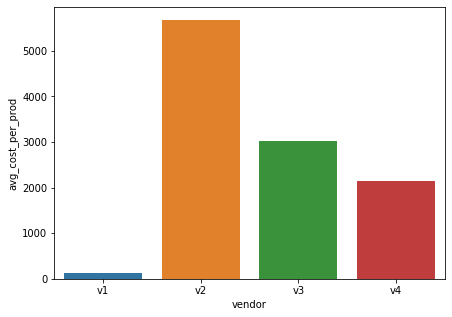

In [38]:
sns.barplot(x="vendor", y="avg_cost_per_prod", data=x);

In [39]:
y = x.set_index('vendor')
y

,prod_vol,cost_incurred,avg_cost_per_prod,percentage_of_supply
vendor,,,,
v1,3099255,414289240,133.673815,88.416936
v2,94423,536187730,5678.571217,2.693742
v3,116688,352614510,3021.857517,3.328928
v4,194907,416713460,2138.011770,5.560394


# percentage of supply

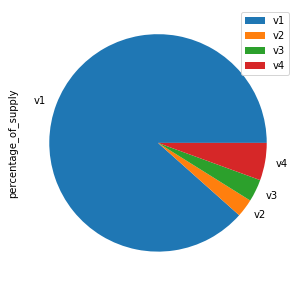

In [40]:
y.plot.pie(y='percentage_of_supply', figsize=(7, 5))

# zone wise shipment of prod_qty

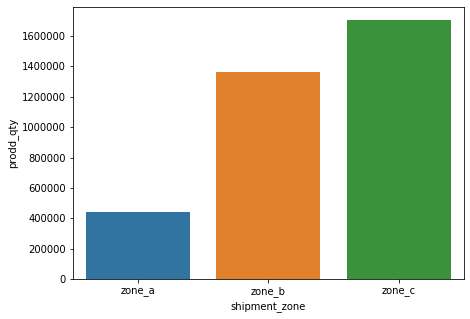

In [41]:
zone_wise_prod = re.groupby(['shipment_zone']).agg(prodd_qty=('prod_qty', sum))
zone_wise_prod = zone_wise_prod.reset_index()
sns.barplot(x="shipment_zone", y="prodd_qty", data=zone_wise_prod);

# shipment size of products across vendors

C:\Users\sudharsan\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


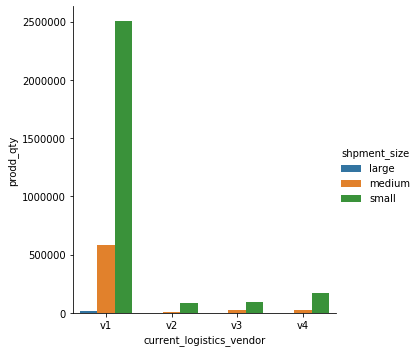

In [42]:
vendor_size_del = re.groupby(['current_logistics_vendor','shpment_size']).agg(prodd_qty=('prod_qty', sum))
vendor_size_del = vendor_size_del.reset_index()
rcParams['figure.figsize'] = (20,20)
sns.factorplot(x='current_logistics_vendor', y='prodd_qty', hue='shpment_size', data=vendor_size_del, kind='bar')

# vendorwise payment mode

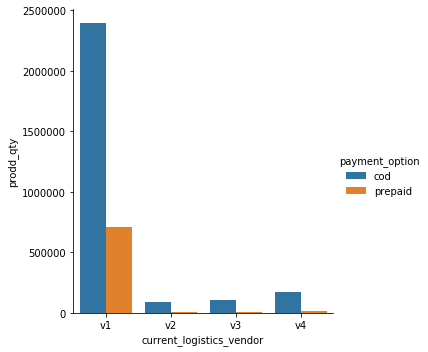

In [43]:
vendor_wise_pymnt_mode = re.groupby(['current_logistics_vendor','payment_option']).agg(prodd_qty=('prod_qty', sum))
vendor_wise_pymnt_mode = vendor_wise_pymnt_mode.reset_index()
rcParams['figure.figsize'] = (20,20)
sns.factorplot(x='current_logistics_vendor', y='prodd_qty', hue='payment_option', data=vendor_wise_pymnt_mode, kind='bar')

# payment mode

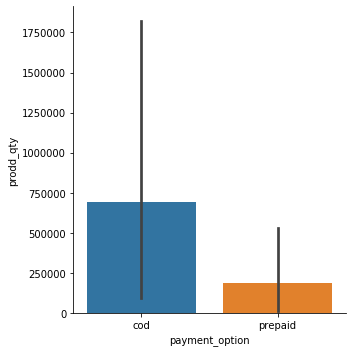

In [44]:
vendor_wise_pymnt_ = re.groupby(['current_logistics_vendor','payment_option']).agg(prodd_qty=('prod_qty', sum))
vendor_wise_pymnt_ = vendor_wise_pymnt_.reset_index()
rcParams['figure.figsize'] = (20,20)
sns.factorplot(x='payment_option', y='prodd_qty', data=vendor_wise_pymnt_, kind='bar')